In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import fit_sigmoid, reg_lin, sigmoid, nb_neurons
from IPython.display import clear_output

# Experiment 1


In these experiments, we wish to understand how many data points ($n$) can be learned by a shallow ReLU network with small width (p). 
* Experiment 1.0 shows the evolution of the probability of convergence when $n$ increases. One can observe a sharp transition in the probability, going from 0 to 1 at some $N(d,p)$, which we call the *Convergence Threshold*. 
* Experiment 1.1 shows the evolution of $N(d,p)$ with $p$ fixed. In that case the threshold is linear in $d$.
* Experiment 1.2 shows the evolution of $N(d,p)$ with $d$ fixed. In that case the threshold is sublinear in $p$, and could be only logarithmically growing.

**Uncertainties** In experiment 1.0, the uncertainty bars were computed using a Chernoff bound on the mean probabilities. Thus, each error bar is a 95% confidence interval. When the empirical probabilities were 0 or 1, we used only one side of the Chernoff bound.

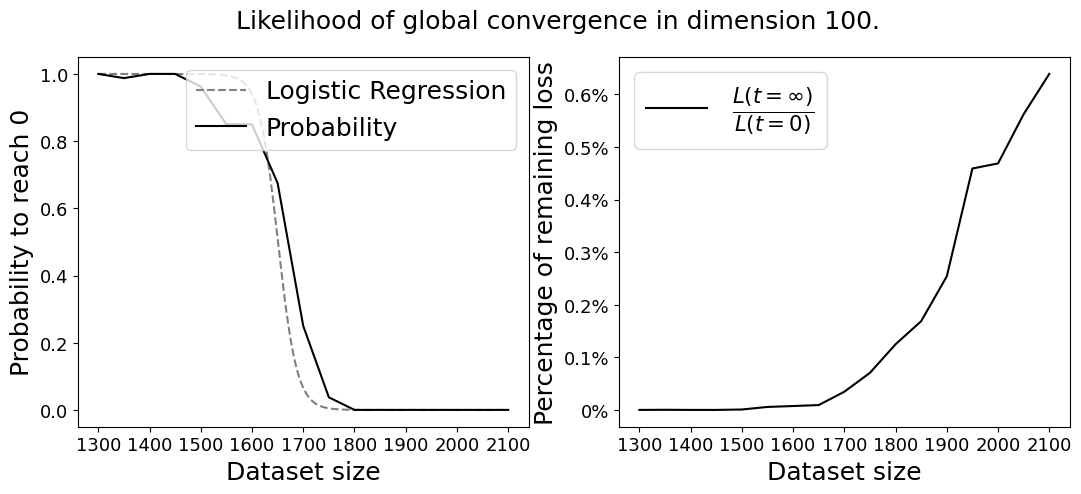

In [16]:
""" EXP1.0: Plot the probability of convergence and the loss at convergence in dimension d=100. """

d=100
data = pd.read_csv(f'raw_experiments/Data_exp_1_{d}_bis.csv')

# In case we accidently stored tensors, which were converted to strings.
loss = data['loss_trend']
if type(loss[0]) == str:
    Loss_trend = [] # Since we stored the 'tensor(x)' instead of x.
    for s in loss:
        inside_parentheses = s.split("(")
        inside_parentheses = inside_parentheses[-1].rstrip(")")
        number = float(inside_parentheses)
        Loss_trend.append(number)
else:
    Loss_trend = loss


CV_Probability = data['CV_probability']
list_n = data['n']
CV_threshold = fit_sigmoid(list_n, CV_Probability)/1300
X = np.linspace(1, 21/13, 10000)
Y = sigmoid(-(X-CV_threshold)*70)

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12.8,4.8))
fontsize=18

ax[0].plot(1300*X, Y, linestyle="dashed", c="grey", label='Logistic Regression')
ax[0].plot(list_n, CV_Probability, c='k', label='Probability')
ax[0].set_ylabel("Probability to reach 0", fontsize=fontsize)
ax[0].set_xlabel("Dataset size", fontsize=fontsize)

ax[1].plot(list_n, Loss_trend, c='k', label=r"$\frac{L(t=\infty)}{L(t=0)}$")
ax[1].set_ylabel("Percentage of remaining loss", fontsize=fontsize)
ax[1].set_xlabel("Dataset size", fontsize=fontsize)

fig.suptitle(f"Likelihood of global convergence in dimension {d}.", fontsize=fontsize)
ax[0].legend(fontsize=18, loc='upper right')
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), fontsize=13)
ax[0].set_yticklabels(labels=ax[0].get_yticklabels(), fontsize=13)
ax[1].legend(fontsize=22)
ax[1].set_xticklabels(labels=ax[0].get_xticklabels(), fontsize=13)
ax[1].set_yticklabels(labels=["", "0%", "0.1%", "0.2%", "0.3%", "0.4%", "0.5%", "0.6%"], fontsize=13)
plt.savefig("Images/CV_probability.png", bbox_inches='tight', dpi=600)
clear_output()
plt.show()

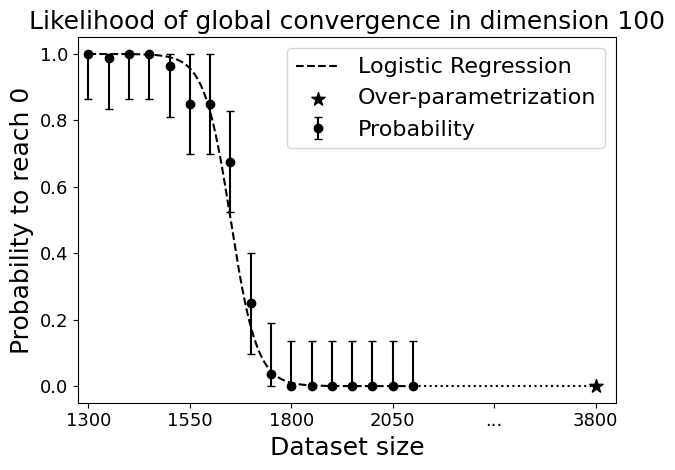

In [17]:
""" EXP1.0: Plot the probability of convergence in dimension d=100, with error bars. """

d=100
data = pd.read_csv(f'raw_experiments/Data_exp_1_{d}_bis.csv')
max_n = max(list_n)
min_n = min(list_n)

# In case we accidently stored tensors, which were converted to strings.
loss = data['loss_trend']
if type(loss[0]) == str:
    Loss_trend = [] # Since we stored the 'tensor(x)' instead of x.
    for s in loss:
        inside_parentheses = s.split("(")
        inside_parentheses = inside_parentheses[-1].rstrip(")")
        number = float(inside_parentheses)
        Loss_trend.append(number)
else:
    Loss_trend = loss


CV_Probability = data['CV_probability']
list_n = data['n']
CV_threshold = fit_sigmoid(list_n, CV_Probability)/min_n
X = np.linspace(1, max_n/min_n, 30000)
Y = sigmoid(-(X-CV_threshold)*40)

fontsize=18

plt.plot(min_n*X, Y, linestyle="dashed", c="k", label='Logistic Regression')

rep=80
error = np.array([np.sqrt(np.log((1+int(not(p>0.99 or p<0.01)))/0.05)/(2*rep)) for p in CV_Probability]) # When p=1 or p=0, then one needs only on side of the error bars, and thus have a reduced width.
lower_bound = np.maximum(0, CV_Probability - error)
upper_bound = np.minimum(1, CV_Probability + error)
lower_errors = np.maximum(CV_Probability - lower_bound, 0)
upper_errors = np.maximum(upper_bound - CV_Probability, 0)
plt.errorbar(list_n, CV_Probability, yerr=[lower_errors, upper_errors], capsize=3, fmt='o', c='k', label='Probability')
plt.ylabel("Probability to reach 0", fontsize=fontsize)
plt.xlabel("Dataset size", fontsize=fontsize)

max_p=nb_neurons(max_n, 0.05)
normal_ticks=np.arange(min_n, max_n, 250)
dots_ticks = max(normal_ticks) + 250
max_ticks = dots_ticks + 250
xticks = list(normal_ticks) + [dots_ticks] + [max_ticks]
xlabels = [str(tick) for tick in normal_ticks] + ["...", f"{d*max_p}"]
plt.plot(np.arange(max_n, max_ticks, 1), [0]*(max_ticks-max_n), c="k", linestyle="dotted")
plt.scatter([2550], [0], c='k', s=100, marker='*', label="Over-parametrization")

plt.xticks(xticks, xlabels, fontsize=13)
plt.xlim(min_n*0.98, max_ticks*1.02)

yticks = list((np.arange(0., 10.+2, 2)//1)/10)
ylabels = [str(tick) for tick in yticks]
plt.yticks(yticks, ylabels, fontsize=13)

plt.title(f"Likelihood of global convergence in dimension {d}", fontsize=fontsize)
plt.legend(fontsize=16, loc='upper right')
plt.tight_layout()
plt.savefig("Images/CV_probability_2.png", bbox_inches='tight', dpi=600)
clear_output()
plt.show()

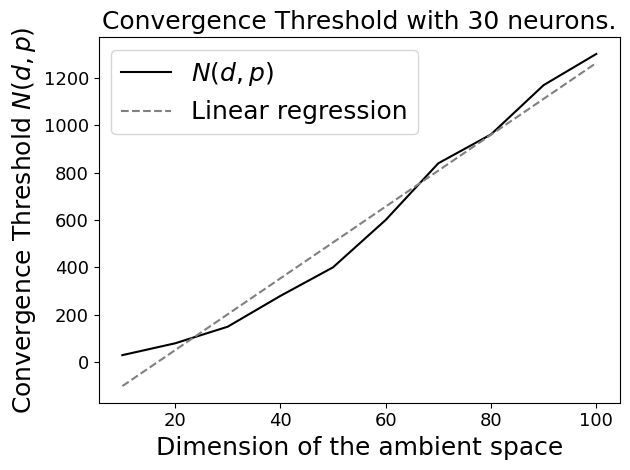

In [18]:
""" EXP1.1: Scaling law of the Convergence Threshold in d. """

threshold=[]
d_range = [d for d in range(10, 100+10, 10)]
for d in d_range:
    data = pd.read_csv(f'raw_experiments/Data_exp_1_d_{d}.csv')

    loss = data['loss_trend']
    if type(loss[0]) == str:
        Loss = [] # Since we stored the 'tensor(x)' instead of x.
        for s in loss:
            inside_parentheses = s.split("(")
            inside_parentheses = inside_parentheses[-1].rstrip(",")
            number = float(inside_parentheses[0])
            Loss.append(number)
    else:
        Loss = loss

    proba = data['CV_probability']
    n = np.array(data['n'])/(data['n'][0])*80

    threshold.append(fit_sigmoid(n, proba)*data['n'][0]/80)

p=data['p'][0]
plt.plot(d_range, threshold, c='k', label=r"$N(d,p)$")
a, b, _ = reg_lin(np.array(d_range), threshold)
plt.plot(d_range, a*np.array(d_range)+b, linestyle="dashed", c="grey", label="Linear regression")
plt.xlabel("Dimension of the ambient space", fontsize=18)
plt.ylabel(r"Convergence Threshold $N(d,p)$", fontsize=18)
plt.title(f"Convergence Threshold with {p} neurons.", fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("Images/Convergence_Threshold_d.png", bbox_inches='tight', dpi=800)
clear_output()
plt.show()

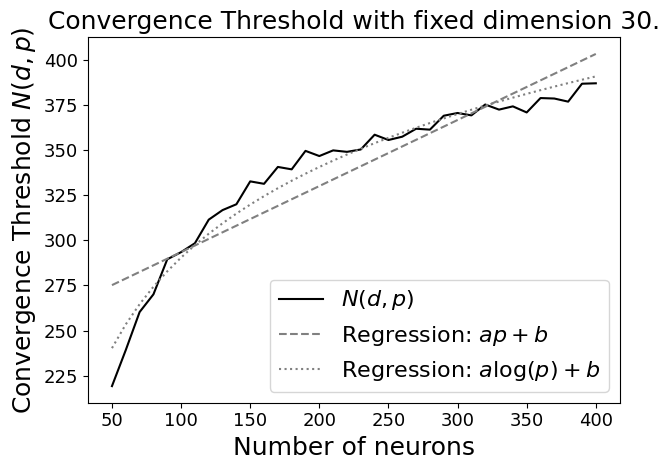

In [19]:
""" EXP1.2: Scaling law of the Convergence Threshold in p. """
threshold=[]
p_range = np.array([p for p in range(50, 400+10, 10)])
for p in p_range:
    data = pd.read_csv(f'raw_experiments/Data_exp_1_p_{p}.csv')

    loss = data['loss_trend']
    if type(loss[0]) == str:
        Loss = [] # Since we stored the 'tensor(x)' instead of x.
        for s in loss:
            inside_parentheses = s.split("(")
            inside_parentheses = inside_parentheses[-1].rstrip(",")[0]
            number = float(inside_parentheses)
            Loss.append(number)
    else:
        Loss = loss

    proba = data['CV_probability']
    d = data['d'][0]
    n = np.array(data['n'])/(data['n'][0])*80

    threshold.append(fit_sigmoid(n, proba)*data['n'][0]/80)

plt.plot(p_range, threshold, c='k', label=r"$N(d,p)$")

a, b, r = reg_lin(p_range, threshold)
plt.plot(p_range, a*np.array(p_range)+b, c='grey', linestyle="dashed", label=r"Regression: $ap+b$")

log_p_range = np.log(np.array(p_range))
a, b, r = reg_lin(log_p_range, threshold)
plt.plot(p_range, a*log_p_range+b, c='grey', linestyle="dotted", label=r"Regression: $a \log(p)+b$")

plt.xlabel("Number of neurons", fontsize=18)
plt.ylabel(r"Convergence Threshold $N(d,p)$", fontsize=18)
plt.title(f"Convergence Threshold with fixed dimension {d}.", fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.savefig("Images/Convergence_Threshold_p.png", bbox_inches='tight', dpi=600)
plt.show()

# Experiment 2

In this experiment, we want to show that conjecture 8 is true: the asymptotical local-PL curvature evolves as $\frac{1}{\sqrt{n}}$. We thus train networks with varying number of example (from 1000 to 2000 orthogonal examples) to compute the rate at which the local-PL curvature declines. We do so in 3 distinct ways:
* We measure the local-PL at the end of the training: $\mu(t_{\infty})$ ($t_{\infty}$ being the last epoch),
* We measure the average-PL curvature until the end of the training: $\langle \mu_{\infty} \rangle$,
* We compute lower and upper bounds for the local-PL coefficient (the ones from Lemma 12) and evaluate them at the last epoch: $\mu_{\text{low}}$ and $\mu_{\text{upp}}$.

Then, for each measure we compute the least-square linear regression in log-log. If the conjecture is true, we expect values close to $-\frac{1}{2}$ for each measure.

**Results.** We observe that all slopes take values around $-\frac{1}{2}$, as expected.

**Uncertainties.** The confidence interval around $a$ is computed as follows: 
* we consider that the true PL target is noisy with a noise $\epsilon_i$, 
* thus, the introduces an error on $a$ which is of the size $\max(\epsilon_i)$,
* by using the empirical $\max(\epsilon_i)$ and a Chernoff bound, we find that $|a - \hat{a}| \leq 2\max(\epsilon_i)\sqrt{\frac{\log(\frac{2}{\delta})}{2N}}$

In this experiment, we use $N=250$ and $\delta=0.05$ in order to have (roughly) 10% confidence interval.

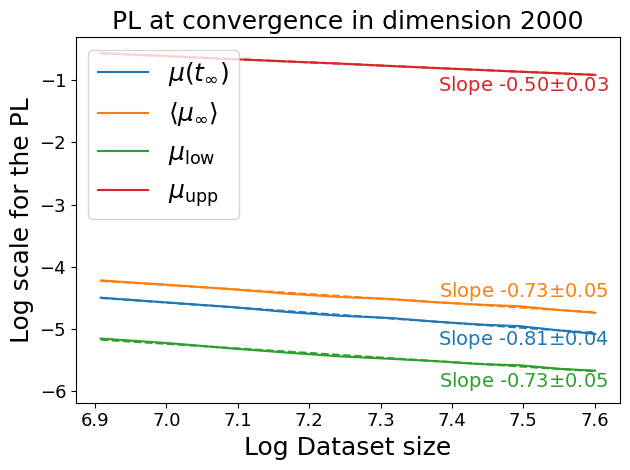

In [21]:
""" EXP2: Verifying Conjecture 8. """

data = pd.read_csv(f'raw_experiments/Data_exp_2_bis.csv')

d = data['d'][0]
list_n = data['n']
log_Speed = data['log_speed']
log_avg_Speed = data['log_avg_speed']
log_Lower = data['log_lower']
log_Upper = data['log_upper']

rep=500

log_list_n = np.log(np.array(list_n))
a, b, max_eps = reg_lin(log_list_n, log_Speed)
noise=np.sqrt(np.log(2/0.05)*4*max_eps**2/(2*rep))
plt.plot(log_list_n, log_Speed, label = r"$\mu(t_{\infty})$", c='C0')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C0')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b-0.2, f"Slope {a:0{1}.{2}f}"+r"$\pm$"+f"{noise:0{1}.{2}f}", fontsize=14, ha='center', c='C0')

a, b, max_eps = reg_lin(log_list_n, log_avg_Speed)
noise=np.sqrt(np.log(2/0.05)*4*max_eps**2/rep)
plt.plot(log_list_n, log_avg_Speed, label = r"$\langle \mu_{\infty}\rangle$", c='C1')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C1')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b+0.25, f"Slope {a:0{1}.{2}f}"+r"$\pm$"+f"{noise:0{1}.{2}f}", fontsize=14, ha='center', c='C1')

log_Lower = np.array(log_Lower)
a, b, max_eps = reg_lin(log_list_n, log_Lower)
noise=np.sqrt(np.log(2/0.05)*4*max_eps**2/rep)
plt.plot(log_list_n, log_Lower, label = r"$\mu_{\text{low}}$", c='C2')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C2')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b-0.25, f"Slope {a:0{1}.{2}f}"+r"$\pm$"+f"{noise:0{1}.{2}f}", fontsize=14, ha='center', c='C2')

a, b, max_eps = reg_lin(log_list_n, log_Upper)
noise=np.sqrt(np.log(2/0.05)*4*max_eps**2/rep)
plt.plot(log_list_n, log_Upper, label = r"$\mu_{\text{upp}}$", c='C3')
plt.plot(log_list_n, [a*n+b for n in log_list_n], linestyle="dashed", c='C3')
plt.text(log_list_n[-1]-0.1, a*log_list_n[-1]+b-0.25, f"Slope {a:0{1}.{2}f}"+r"$\pm$"+f"{noise:0{1}.{2}f}", fontsize=14, ha='center', c='C3')

plt.xlabel("Log Dataset size", fontsize=18)
plt.ylabel("Log scale for the PL", fontsize=18)
plt.title(f"PL at convergence in dimension {d}", fontsize=18)
plt.legend(loc="upper left", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
b,t = plt.ylim()
plt.ylim(b-0.25,t)
plt.tight_layout()
plt.savefig("Images/Asymptotic_log_mean_PL.png", bbox_inches='tight', dpi=600)
plt.show()